In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data set 
data=pd.read_csv("C:\\Users\\fahad\\OneDrive\\Desktop\\Unified mentor\\Proj 2 Supermarket\\Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [3]:
# Inspect the data
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,8-11-17,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,8-11-17,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,12-06-17,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,11-10-16,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,11-10-16,South,2355,0.26,918.45,Tamil Nadu


In [4]:
# Check the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
# change the data type of the date column
data["Order Date"]=pd.to_datetime(data["Order Date"],errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


C:\Users\fahad\AppData\Local\Temp\ipykernel_4124\1646526494.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Order Date"]=pd.to_datetime(data["Order Date"],errors="coerce")


In [6]:
# Check for null values
data.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [7]:
# Extract day, month and year from the date
data["Order day"]=data["Order Date"].dt.day_name()
data["Order month"]=data["Order Date"].dt.month_name()
data["Order year"]=data["Order Date"].dt.year
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order day,Order month,Order year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,Friday,August,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,Friday,August,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,Wednesday,December,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,Thursday,November,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,Thursday,November,2016


In [8]:
# Find sales by category
sales_by_category=data.groupby("Category")["Sales"].sum().reset_index()
sales_by_category

,Category,Sales
0,Bakery,2112281
1,Beverages,2085313
2,"Eggs, Meat & Fish",2267401
3,Food Grains,2115272
4,Fruits & Veggies,2100727
5,Oil & Masala,2038442
6,Snacks,2237546


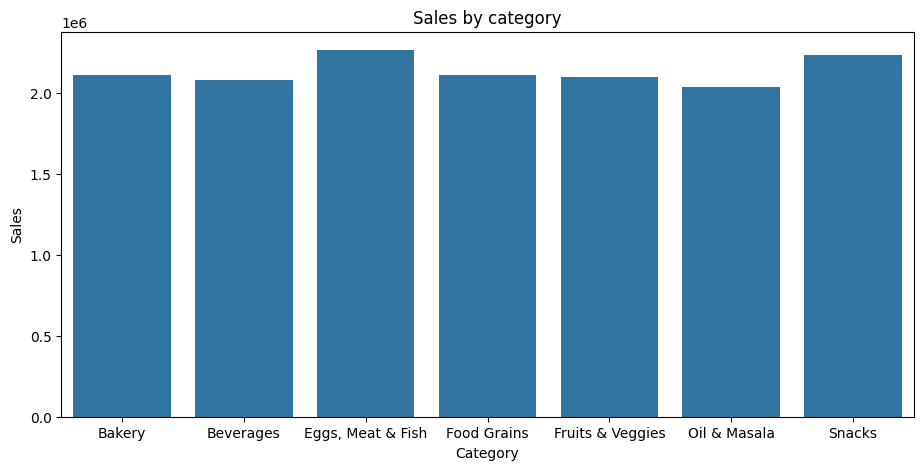

In [9]:
# Draw the bar chart 
plt.figure(figsize=(11,5))
sns.barplot(data=sales_by_category,x="Category",y="Sales")
plt.title("Sales by category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

In [10]:
# Find sales by month
sales_by_months=data.groupby("Order month")["Sales"].sum().reset_index()
sales_by_months

,Order month,Sales
0,April,1028352
1,August,1220430
2,December,1602710
3,February,830301
4,January,902128
5,July,1107483
6,June,1028694
7,March,1247196
8,May,1251327
9,November,1794831


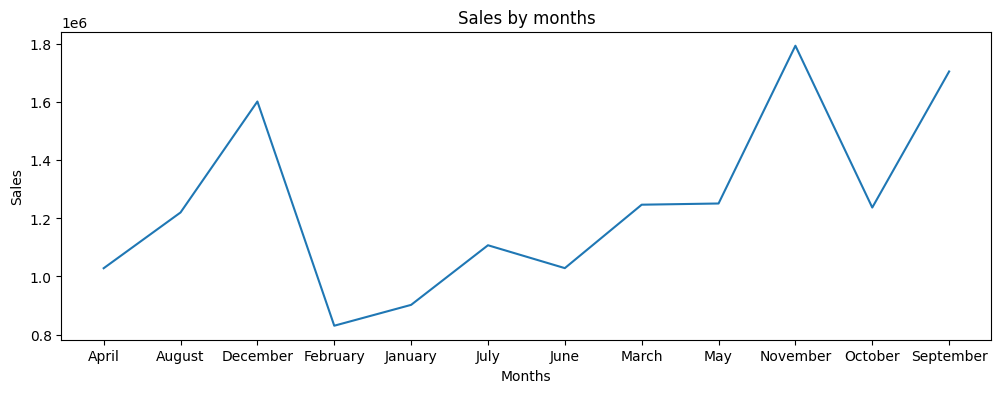

In [11]:
# Draw the line chart 
plt.figure(figsize=(12,4))
sns.lineplot(data=sales_by_months,x="Order month",y="Sales")
plt.title("Sales by months")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()

In [12]:
# sales by year
sales_by_year=data.groupby("Order year")["Sales"].sum()
sales_by_year

Order year
2015    2975599
2016    3131959
2017    3871912
2018    4977512
Name: Sales, dtype: int64

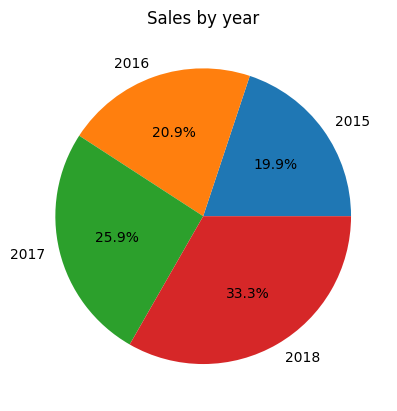

In [17]:
#draw pie chart
plt.pie(sales_by_year,labels=sales_by_year.index,autopct="%1.1f%%")
plt.title("Sales by year")
plt.show()

In [18]:
#Top 5 sales by city
sales_by_city=data.groupby("City")["Sales"].sum().reset_index().sort_values(by="Sales",ascending=False).head(5)
sales_by_city

,City,Sales
6,Kanyakumari,706764
21,Vellore,676550
0,Bodi,667177
19,Tirunelveli,659812
13,Perambalur,659738


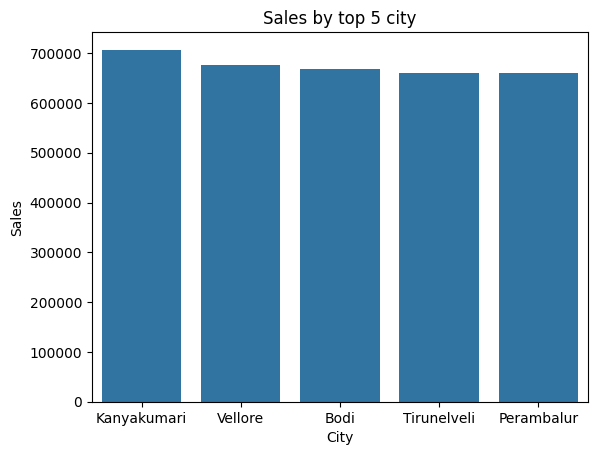

In [19]:
#draw bar chart
sns.barplot(data=sales_by_city,x="City",y="Sales")
plt.title("Sales by top 5 city")
plt.xlabel("City")
plt.ylabel("Sales")
plt.show()